<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/MINST-Digits-Classification/blob/main/MINST_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import math

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)


In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
own_images = []

for i in range(0,10):
  own_images.append(f'/content/{i}a.png')
  own_images.append(f'/content/{i}b.png')

sample_x = []
sample_y = []

test_samples_x = []

for i in range(0, len(own_images)):
  img = image.load_img(own_images[i], target_size=(28,28), color_mode='grayscale')
  img_array = image.img_to_array(img)
  # img_array = img_array / 255.0
  img_array = 1.0 - img_array
  img_array = np.expand_dims(img_array, axis=0)
  test_samples_x.append(img_array.squeeze())
  if(i%2==0):
    sample_x.append(img_array.squeeze())
    sample_y.append(round(i/2))

In [7]:
sample_x = np.array(sample_x)
sample_y = np.array(sample_y)

In [8]:
sample_y.shape

(10,)

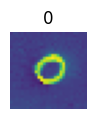

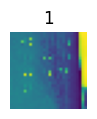

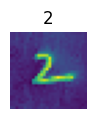

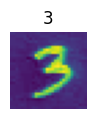

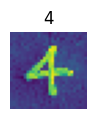

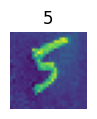

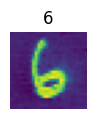

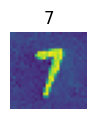

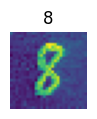

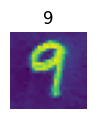

In [9]:
for i in range(0, len(sample_x)):
  plt.figure(figsize=(1,1))
  plt.imshow(sample_x[i])
  plt.title(sample_y[i])
  plt.axis('off')
  plt.show()

In [10]:
new_x = np.concatenate((x_train, sample_x), axis=0)
new_y = np.concatenate((y_train, sample_y), axis=0)

In [11]:
print(new_x.shape)
print(new_y.shape)

(60010, 28, 28)
(60010,)


In [12]:
ohe = OneHotEncoder()
y_train_ohe = ohe.fit_transform(new_y.reshape(-1,1)).toarray()
y_test_ohe = ohe.transform(y_test.reshape(-1,1)).toarray()

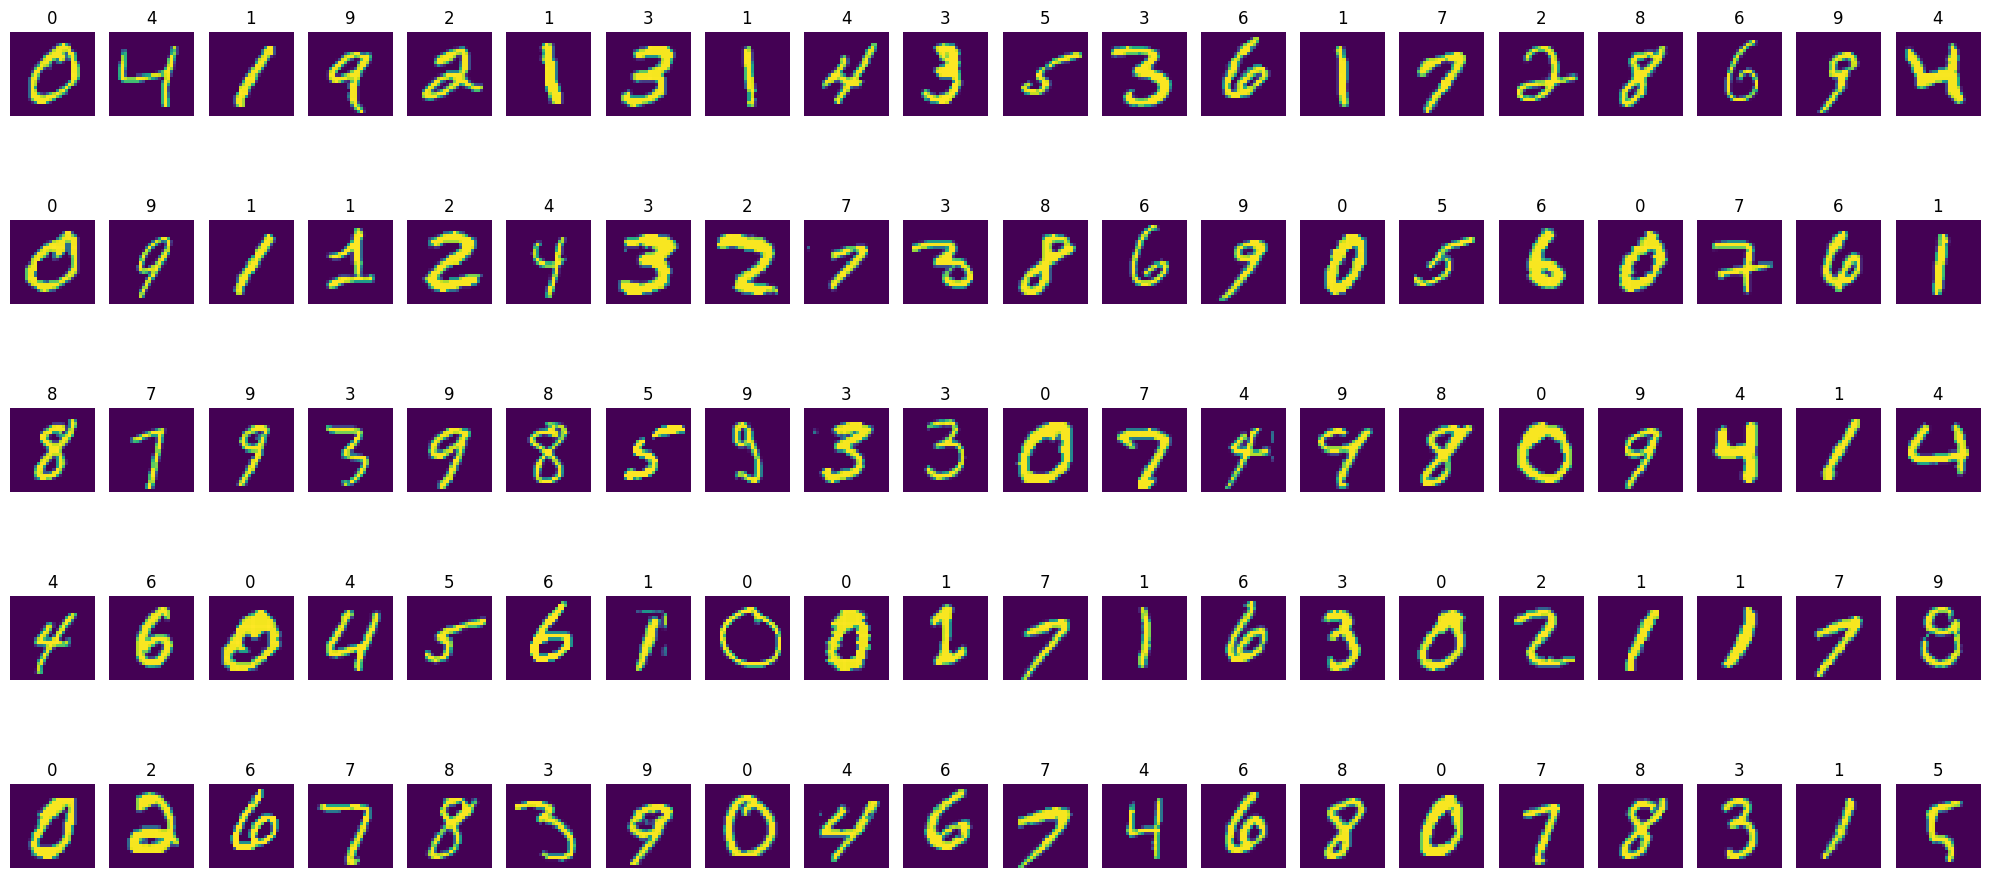

In [13]:
plt.figure(figsize=(20,10))

for i in range(1,101):
  plt.subplot(5,20,i)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [38]:
model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(64, activation='relu', name='L1'),
    Dense(16, activation='relu', name='L2'),
    Dense(10, activation='softmax', name='L3')
], name='my_model')

In [39]:
model.compile(
    loss = CategoricalCrossentropy(),
    optimizer = Adam(learning_rate=0.001)
)

In [40]:
model.fit(new_x, y_train_ohe, epochs=100)

Epoch 1/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.6195
Epoch 2/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.1416
Epoch 3/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7864
Epoch 4/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4909
Epoch 5/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2795
Epoch 6/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2023
Epoch 7/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1658
Epoch 8/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1505
Epoch 9/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1287
Epoch 10/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1216
Epoch 11/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1422
Epoch 12/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1064
Epoch 13/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1013
Epoch 14/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0960
Epoch 15/100
18

In [41]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


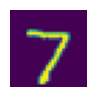

In [42]:
print(np.argmax(y_pred[0]))
print(y_pred[0])
plt.figure(figsize=(1,1))
plt.imshow(x_test[0])
plt.axis('off')
plt.show()

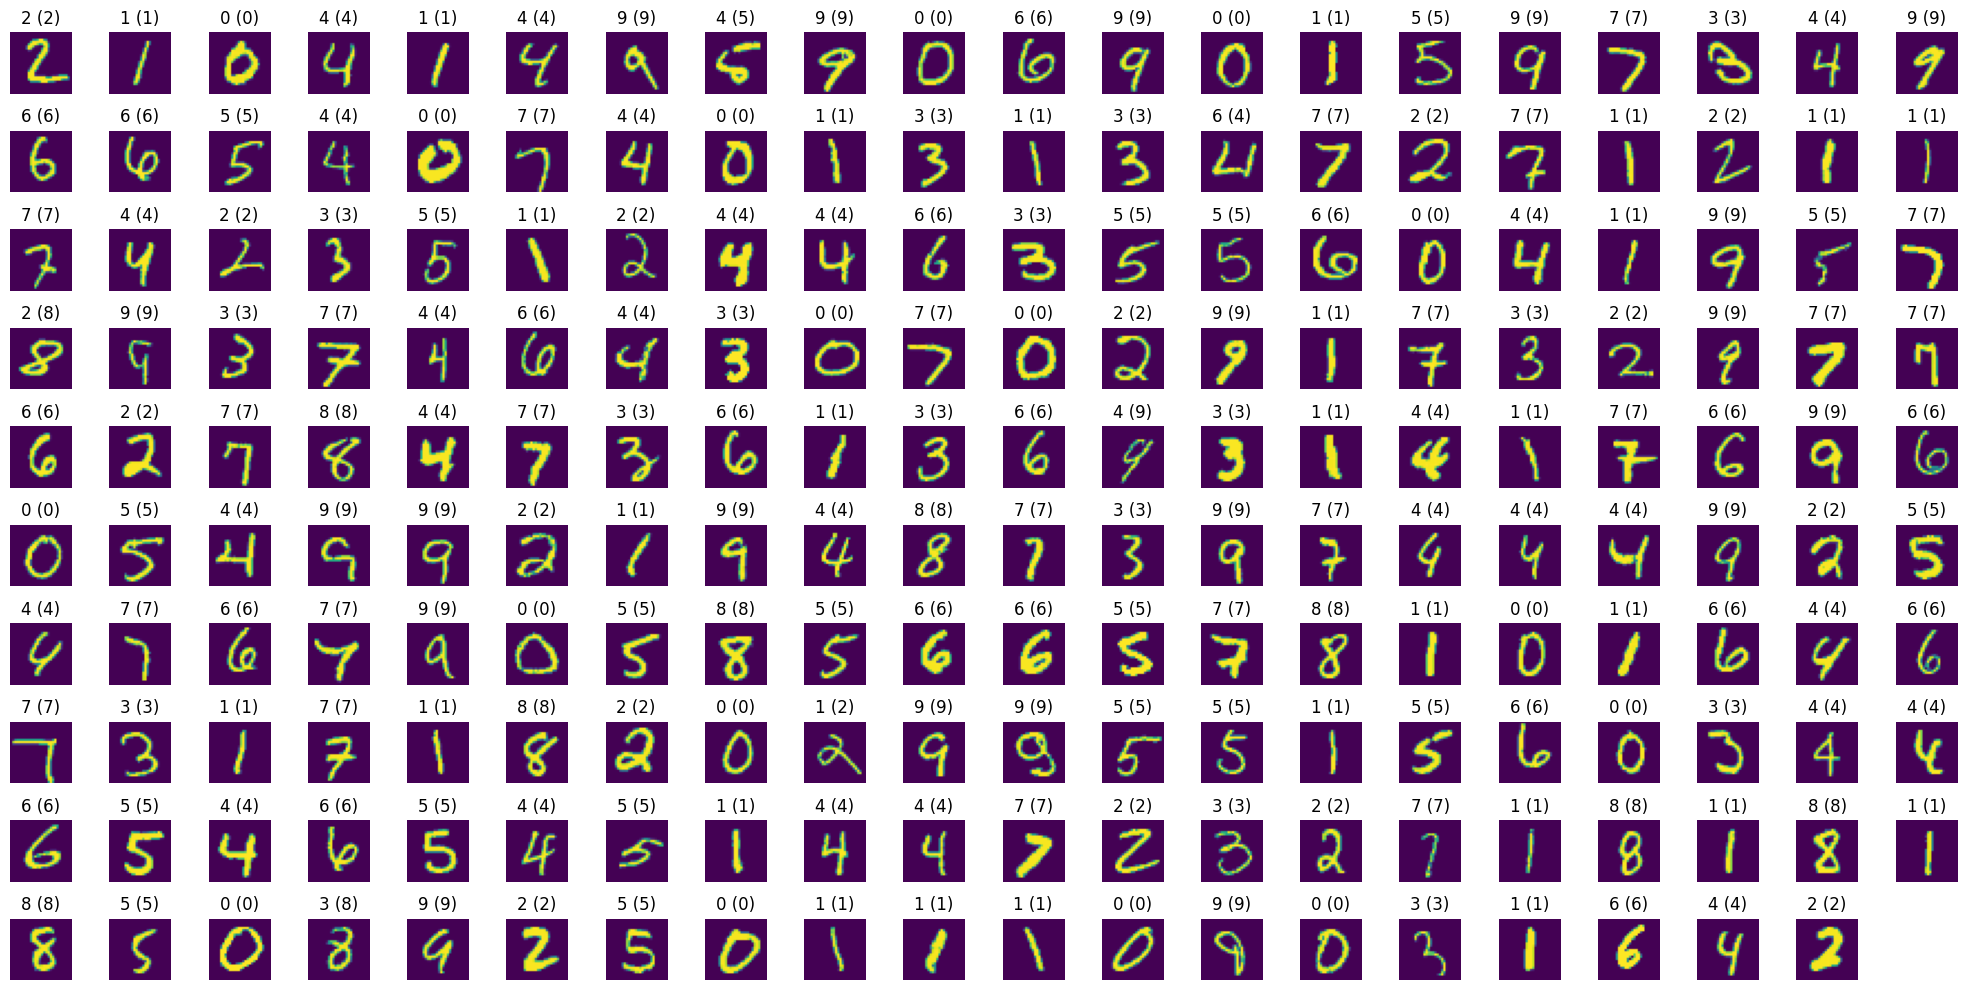

In [43]:
plt.figure(figsize=(20,10))

for i in range(1, 200):
  plt.subplot(10,20,i)
  plt.imshow(x_test[i])
  plt.title(f'{np.argmax(y_pred[i])} ({y_test[i]})')
  plt.axis('off')

plt.tight_layout()
plt.show()

392


/tmp/ipython-input-1426245351.py:21: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


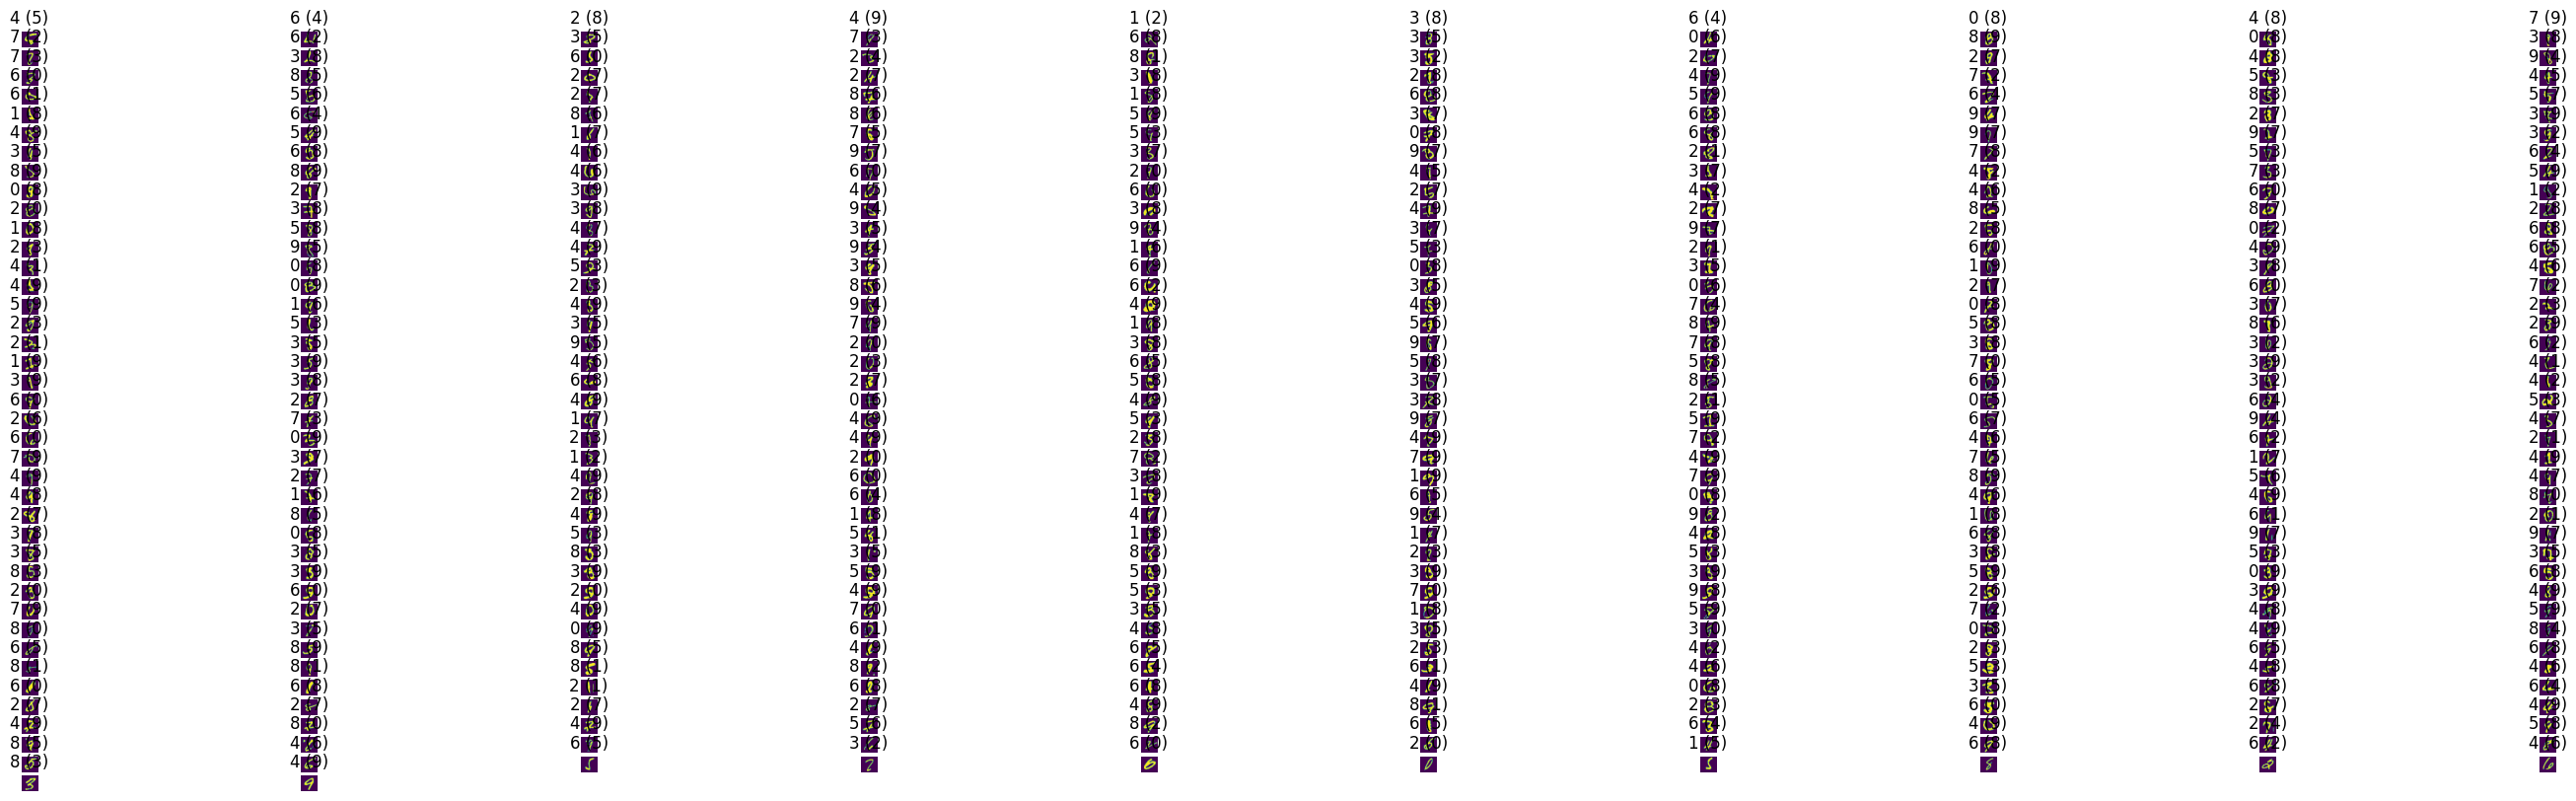

In [44]:
misclassified_x = []
misclassified_y = []
actual_y = []

for i in range(1, len(x_test)):
  if(np.argmax(y_pred[i]) != y_test[i]):
    misclassified_x.append(x_test[i])
    misclassified_y.append(np.argmax(y_pred[i]))
    actual_y.append(y_test[i])

print(len(misclassified_x))

plt.figure(figsize=(36,10))

for i in range(0,len(misclassified_x)):
  plt.subplot(math.ceil(len(misclassified_x) / 10) ,10,i+1)
  plt.imshow(misclassified_x[i])
  plt.title(f'{misclassified_y[i]} ({actual_y[i]})')
  plt.axis('off')

plt.tight_layout()
plt.show()

In [45]:
accuracy_score(y_test, np.argmax(y_pred, axis=1))

0.9608

In [46]:
test = np.array(test_samples_x)

In [47]:
predicted = model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


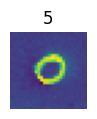

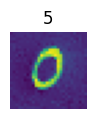

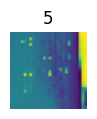

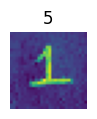

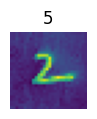

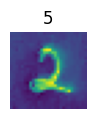

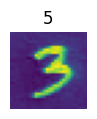

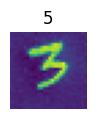

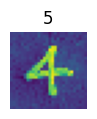

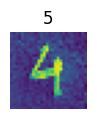

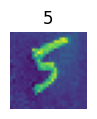

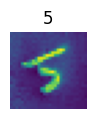

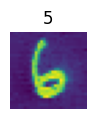

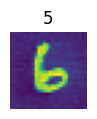

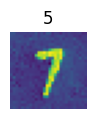

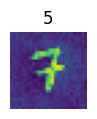

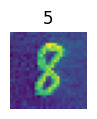

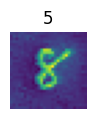

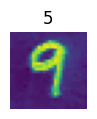

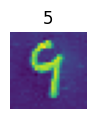

In [48]:
for i in range(len(test)):
  plt.figure(figsize=(1,1))
  plt.imshow(test[i])
  plt.title(np.argmax(predicted[i]))
  plt.axis('off')
  plt.show()

In [49]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L1 (Dense)                      │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,352 (602.94 KB)

 Trainable params: 51,450 (200.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 102,902 (401.96 KB)

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


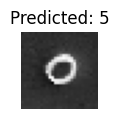

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


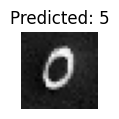

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


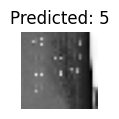

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


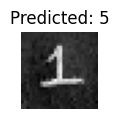

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


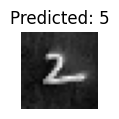

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


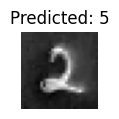

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


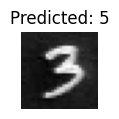

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


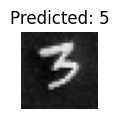

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


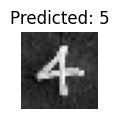

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


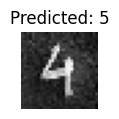

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


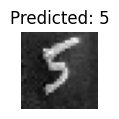

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


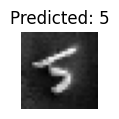

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


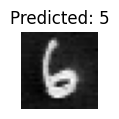

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


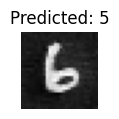

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


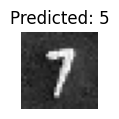

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


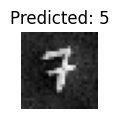

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


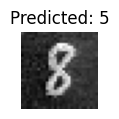

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


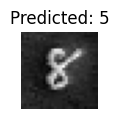

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


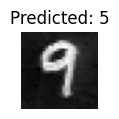

Image shape passed to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


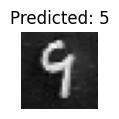

In [50]:
for img_path in own_images:
    # Load image as grayscale, resize to 28x28
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

    # Convert to array → shape (28, 28, 1)
    img_array = image.img_to_array(img)

    # Squeeze to remove channel → shape (28, 28)
    img_array = np.squeeze(img_array)

    # Normalize and invert if necessary
    img_array = img_array / 255.0
    img_array = 1.0 - img_array  # Remove this line if your training data wasn't inverted

    # Add batch dimension → shape (1, 28, 28)
    img_array = np.expand_dims(img_array, axis=0)

    print(f"Image shape passed to model: {img_array.shape}")  # (1, 28, 28)

    # Predict
    predicted = model.predict(img_array)
    predicted_label = np.argmax(predicted)

    # Show image
    plt.figure(figsize=(1, 1))
    plt.imshow(img_array[0], cmap='gray')
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

In [ ]:
# test_images = []

# for i in range(0,10):
#   test_images.append(f'/content/{i}a.png')
#   test_images.append(f'/content/{i}b.png')

In [ ]:
# for i in range(0, len(test_images)):
#   img = image.load_img(test_images[i], target_size=(28,28), color_mode='grayscale')
#   img_array = image.img_to_array(img)
#   img_array = img_array / 255.0
#   img_array = 1.0 - img_array
#   img_array = np.expand_dims(img_array, axis=0)
#   predicted = model.predict(img_array)
#   print(predicted)
#   plt.figure(figsize=(1,1))
#   plt.imshow(img_array[0], cmap='gray')
#   plt.title(np.argmax(predicted))
#   plt.axis('off')
#   plt.show()

In [37]:
img = image.load_img('/content/1a.png', target_size=(28,28), color_mode='grayscale')
img_array = image.img_to_array(img).squeeze()  # Now (28, 28)
img_array = 1.0 - img_array  # optional
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Now (1, 28, 28)

print("Shape going to model:", img_array.shape)

# Should now work:
pred = model.predict(img_array)
print("Prediction:", np.argmax(pred))


Shape going to model: (1, 28, 28)


InvalidArgumentError: Graph execution error:

Detected at node my_model_1/flatten_1/Reshape defined at (most recent call last):
<stack traces unavailable>
only one input size may be -1, not both 0 and 1

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "/usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 712, in start
File "/usr/local/lib/python3.12/dist-packages/tornado/platform/asyncio.py", line 205, in start
File "/usr/lib/python3.12/asyncio/base_events.py", line 645, in run_forever
File "/usr/lib/python3.12/asyncio/base_events.py", line 1999, in _run_once
File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run
File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
File "/usr/local/lib/python3.12/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
File "/usr/local/lib/python3.12/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.12/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "/tmp/ipython-input-1546332280.py", line 7, in <cell line: 0>
File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 566, in predict
File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 260, in one_step_on_data_distributed
File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 250, in one_step_on_data
File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 105, in predict_step
File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py", line 936, in __call__
File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.12/dist-packages/keras/src/ops/operation.py", line 58, in __call__
File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.12/dist-packages/keras/src/models/sequential.py", line 220, in call
File "/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py", line 183, in call
File "/usr/local/lib/python3.12/dist-packages/keras/src/ops/function.py", line 177, in _run_through_graph
File "/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py", line 648, in call
File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py", line 936, in __call__
File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.12/dist-packages/keras/src/ops/operation.py", line 58, in __call__
File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py", line 54, in call
File "/usr/local/lib/python3.12/dist-packages/keras/src/ops/numpy.py", line 5074, in reshape
File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/numpy.py", line 2068, in reshape

	 [[{{node my_model_1/flatten_1/Reshape}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_617061[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_617076]